<a href="https://colab.research.google.com/github/ayushs0911/NLP-Projects/blob/main/Intent%20Classification%20with%20Deberta%20in%20HuggingFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 100.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 118.8 MB/s eta 0:00:00


In [2]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 20.9 MB/s eta 0:00:00


In [3]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import re
import string
import time
from numpy import random
import gensim.downloader as api
from PIL import Image
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Dense,Flatten,InputLayer,BatchNormalization,Dropout,Input,LayerNormalization
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import (BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives,
                                       TrueNegatives, Precision, Recall, AUC, binary_accuracy,Accuracy,
                                       TopKCategoricalAccuracy, CategoricalAccuracy,SparseCategoricalAccuracy)
from tensorflow.keras.optimizers import Adam
from datasets import load_dataset

from google.colab import drive
from google.colab import files
from transformers import (BertTokenizerFast,TFBertTokenizer,BertTokenizer,RobertaTokenizerFast,
                          DataCollatorWithPadding,TFRobertaForSequenceClassification,TFBertForSequenceClassification,
                          TFBertModel,create_optimizer,TFDebertaForSequenceClassification,DebertaTokenizerFast)

In [7]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
! kaggle datasets download -d bitext/training-dataset-for-chatbotsvirtual-assistants

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 86% 1.00M/1.16M [00:00<00:00, 1.11MB/s]
100% 1.16M/1.16M [00:00<00:00, 1.25MB/s]


In [10]:
!unzip /content/training-dataset-for-chatbotsvirtual-assistants.zip

Archive:  /content/training-dataset-for-chatbotsvirtual-assistants.zip
replace 20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.xlsx  
  inflating: 20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample

In [11]:
dataset = load_dataset ("csv", 
                        data_files = "/content/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.csv")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-33f63414cf02978d/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
dataset

DatasetDict({
    train: Dataset({
        features: ['flags', 'utterance', 'category', 'intent'],
        num_rows: 21534
    })
})

In [13]:
dataset['train'][0]

{'flags': 'BILC',
 'utterance': "I don't have an online account, what do I have to do to register?",
 'category': 'ACCOUNT',
 'intent': 'create_account'}

In [14]:
len(dataset['train']['intent'])

21534

In [15]:
intents = list(set(dataset['train']['intent']))
intents 

['registration_problems',
 'delete_account',
 'complaint',
 'delivery_options',
 'cancel_order',
 'get_invoice',
 'place_order',
 'track_refund',
 'get_refund',
 'check_refund_policy',
 'newsletter_subscription',
 'edit_account',
 'set_up_shipping_address',
 'switch_account',
 'change_order',
 'contact_human_agent',
 'track_order',
 'create_account',
 'change_shipping_address',
 'delivery_period',
 'recover_password',
 'check_cancellation_fee',
 'check_invoices',
 'payment_issue',
 'contact_customer_service',
 'review',
 'check_payment_methods']

In [16]:
dict_intents = {intents[i]: i for i in range(len(intents))}
dict_intents


{'registration_problems': 0,
 'delete_account': 1,
 'complaint': 2,
 'delivery_options': 3,
 'cancel_order': 4,
 'get_invoice': 5,
 'place_order': 6,
 'track_refund': 7,
 'get_refund': 8,
 'check_refund_policy': 9,
 'newsletter_subscription': 10,
 'edit_account': 11,
 'set_up_shipping_address': 12,
 'switch_account': 13,
 'change_order': 14,
 'contact_human_agent': 15,
 'track_order': 16,
 'create_account': 17,
 'change_shipping_address': 18,
 'delivery_period': 19,
 'recover_password': 20,
 'check_cancellation_fee': 21,
 'check_invoices': 22,
 'payment_issue': 23,
 'contact_customer_service': 24,
 'review': 25,
 'check_payment_methods': 26}

In [17]:
def preprocess(dataset):
  return {
      'utterance' : dataset['utterance'],
      'intent' : dict_intents[dataset['intent']]
  }

In [18]:
prep_dataset = dataset.map(preprocess)

Map:   0%|          | 0/21534 [00:00<?, ? examples/s]

In [19]:
for i in range(5):
  print(prep_dataset['train'][i])

{'flags': 'BILC', 'utterance': "I don't have an online account, what do I have to do to register?", 'category': 'ACCOUNT', 'intent': 17}
{'flags': 'BILQZ', 'utterance': 'can you tell me if i can regisger two accounts with a single email address?', 'category': 'ACCOUNT', 'intent': 17}
{'flags': 'BPLC', 'utterance': 'I have no online account, open one, please', 'category': 'ACCOUNT', 'intent': 17}
{'flags': 'BIPLD', 'utterance': 'could you ask an agent how to open an account, please?', 'category': 'ACCOUNT', 'intent': 17}
{'flags': 'BLQC', 'utterance': 'i want an online account, create one', 'category': 'ACCOUNT', 'intent': 17}


In [20]:
model_id="microsoft/deberta-base"
tokenizer = DebertaTokenizerFast.from_pretrained(model_id)

In [21]:
def tokenizer_function(dataset):
  return tokenizer(dataset['utterance'])

In [22]:
tokenized_dataset = prep_dataset.map(tokenizer_function)

Map:   0%|          | 0/21534 [00:00<?, ? examples/s]

In [23]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['flags', 'utterance', 'category', 'intent', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 21534
    })
})

In [24]:
tokenized_dataset['train'][0]

{'flags': 'BILC',
 'utterance': "I don't have an online account, what do I have to do to register?",
 'category': 'ACCOUNT',
 'intent': 17,
 'input_ids': [1,
  100,
  218,
  75,
  33,
  41,
  804,
  1316,
  6,
  99,
  109,
  38,
  33,
  7,
  109,
  7,
  5124,
  116,
  2],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

`token_type_ids`:<br>
The token_type_ids are used in models like BERT and its variants to handle inputs with multiple segments or sentences. In certain natural language processing tasks, such as question-answering or text classification, the input may consist of multiple segments, like a question and a passage of text. The purpose of token_type_ids is to differentiate between these segments.

Consider an example where we have two sentences: "What is the weather forecast today?" (question) and "The weather will be sunny and warm." (context). Each sentence is tokenized into individual tokens. token_type_ids assigns a value to each token indicating which segment it belongs to. In this case, all tokens in the question segment would have a value of 0, and all tokens in the context segment would have a value of 1.

This distinction is crucial because BERT models use a special token, [SEP] (separator token), to separate segments. By providing token_type_ids, the model can differentiate and understand the boundaries between segments during training and inference.

`attention_mask`:<br>
The attention_mask is a binary mask used to indicate which tokens should be attended to (considered) by the model and which ones should be ignored. It has the same length as the input sequence and consists of 1s and 0s, where 1 indicates "attend to this token" and 0 indicates "ignore this token."

The attention_mask serves two primary purposes:
- It allows the model to focus on the relevant tokens while disregarding padding tokens. In token-based models, sequences are often padded to a fixed length, which means they contain special padding tokens. By setting the attention_mask to 0 for padding tokens, the model ignores them during processing.
- It enables the model to handle variable-length sequences by indicating the actual length of each input. The attention_mask ensures that the model attends to valid tokens only and doesn't process any tokens beyond the actual sequence length.

In summary, token_type_ids help distinguish between segments within an input, and attention_mask helps the model identify valid tokens to attend to while disregarding padding tokens and handling variable-length sequences.

If you have further questions or need more clarification, feel free to ask!

1. `DataCollatorWithPadding`: This is a class provided by the Hugging Face Transformers library. It is used for collating and padding sequences in a dataset during training or evaluation. The `DataCollatorWithPadding` class takes care of padding sequences to a common length using the specified tokenizer.

2. `tokenizer`: It appears that you have a tokenizer object that you are passing to the data collator. The tokenizer is responsible for tokenizing and encoding the input text into numerical representations that can be understood by the model.

3. `return_tensors='tf'`: This parameter specifies the format in which the data collator should return the padded sequences. In this case, `'tf'` indicates that the collator will return TensorFlow tensors.

By using the `DataCollatorWithPadding` class and providing the tokenizer, you can now use the `data_collator` object to collate and pad your input sequences during training or evaluation. This is useful when working with sequences of varying lengths that need to be batched together for efficient processing in deep learning frameworks like TensorFlow.

Please note that the specific details and usage may vary depending on the version of the Transformers library you are using.

In [25]:
from transformers.data import data_collator
data_collator = DataCollatorWithPadding(tokenizer = tokenizer, return_tensors = 'tf')

**Prefetch** is by default true in `to_tf_dataset`

In [26]:
tf_dataset = tokenized_dataset['train'].to_tf_dataset(
    columns = ['input_ids', 'attention_mask', 'intent'],
    shuffle = True,
    batch_size = 16,
    collate_fn = data_collator 
)

You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [27]:
def swap_positions(dataset):
  return {'input_ids' : dataset['input_ids'],
          'attention_mask' : dataset['attention_mask']}, dataset['intent']

In [28]:
tf_dataset = tf_dataset.map(swap_positions)

In [29]:
train_dataset = tf_dataset.take(int(0.9*len(tf_dataset)))
val_dataset = tf_dataset.skip(int(0.9*len(tf_dataset)))

In [30]:
for i in val_dataset.take(1):
  print(i)

({'input_ids': <tf.Tensor: shape=(16, 26), dtype=int64, numpy=
array([[    1,   100,   120,    41,  5849,    77,    38,  2120,     7,
          146,    10,  3207,    19,  1886,     2,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [    1,   100,   236,     7,  1394,    13,   335,    59,  2992,
          127,  2229,     2,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [    1,   100,   120,    41,  5849,    77,    38,  2120,     7,
          582,     2,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [    1,   100,   240,    10,  4392,     2,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [    1, 17304,  1717,  1394,    41,  2936,   141,   939,    64,
          192,   127, 12259,   139,  6

## Based on TFDebertaForSequenceClassification

In [31]:
model=TFDebertaForSequenceClassification.from_pretrained(model_id,num_labels=len(intents))
model.summary()

All model checkpoint layers were used when initializing TFDebertaForSequenceClassification.

Some layers of TFDebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['cls_dropout', 'pooler', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_deberta_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 deberta (TFDebertaMainLayer  multiple                 138601728 
 )                                                               
                                                                 
 pooler (TFDebertaContextPoo  multiple                 590592    
 ler)                                                            
                                                                 
 cls_dropout (TFDebertaStabl  multiple                 0         
 eDropout)                                                       
                                                                 
 classifier (Dense)          multiple                  20763     
                                                                 
Total params: 139,213,083
Trainable params: 139,213,083
Non-trainable params: 0
______________

In [32]:
num_epochs = 3
batches_per_epoch = len(tokenized_dataset['train'])//16 #batch_size
total_train_steps = int(batches_per_epoch * num_epochs)


In [33]:
optimizer, schedule = create_optimizer(init_lr = 2e-5,
                                       num_warmup_steps = 0,
                                       num_train_steps = total_train_steps)

In [34]:
model.compile(optimizer = optimizer, 
              metrics = ['accuracy'])

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


In [35]:
history = model.fit(train_dataset, 
                    validation_data = val_dataset,
                    epochs = 3)

Epoch 1/3


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


1211/1211 [==============================] - 362s 229ms/step - loss: 0.2944 - accuracy: 0.9338 - val_loss: 0.0501 - val_accuracy: 0.9903
Epoch 2/3
1211/1211 [==============================] - 269s 222ms/step - loss: 0.0071 - accuracy: 0.9993 - val_loss: 0.0046 - val_accuracy: 0.9995
Epoch 3/3
1211/1211 [==============================] - 258s 213ms/step - loss: 0.0034 - accuracy: 0.9995 - val_loss: 7.0191e-04 - val_accuracy: 1.0000


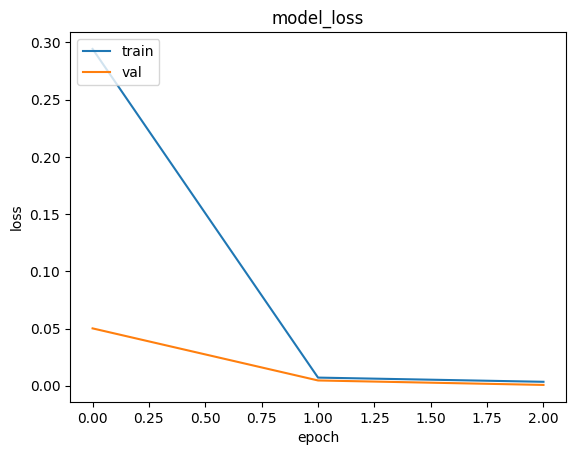

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

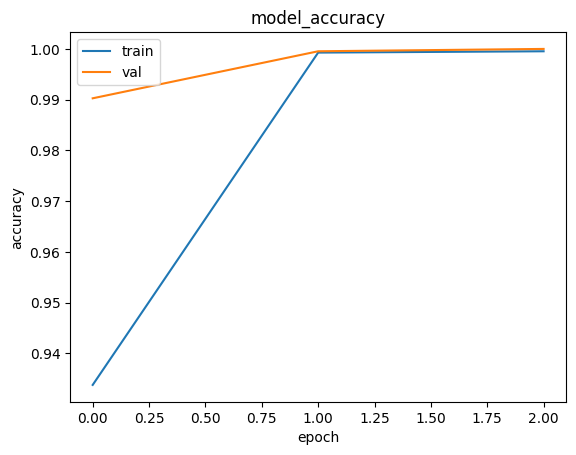

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Testing

In [38]:
inputs = tokenizer(["Please how do i go about the account creation? ",
                    "After setting up my account, i feel like i need to change it. How do i go about that?",
                    "how do i know how much i need to pay?",
                    "purchased a product, which i now want to change"
                    ], padding=True,return_tensors="tf")

logits = model(inputs).logits
outputs=tf.argmax(logits,axis=-1).numpy()

In [41]:
outputs

array([17, 13, 26, 14])

In [42]:
reverse_dict_intents={i:intents[i] for i in range(len(intents))}
print(reverse_dict_intents)

{0: 'registration_problems', 1: 'delete_account', 2: 'complaint', 3: 'delivery_options', 4: 'cancel_order', 5: 'get_invoice', 6: 'place_order', 7: 'track_refund', 8: 'get_refund', 9: 'check_refund_policy', 10: 'newsletter_subscription', 11: 'edit_account', 12: 'set_up_shipping_address', 13: 'switch_account', 14: 'change_order', 15: 'contact_human_agent', 16: 'track_order', 17: 'create_account', 18: 'change_shipping_address', 19: 'delivery_period', 20: 'recover_password', 21: 'check_cancellation_fee', 22: 'check_invoices', 23: 'payment_issue', 24: 'contact_customer_service', 25: 'review', 26: 'check_payment_methods'}


In [43]:
for i in outputs:
  print(reverse_dict_intents[i])

create_account
switch_account
check_payment_methods
change_order


#Evaluation 

In [44]:
predicted = []
labels = []

for input, label in val_dataset:
  predicted.append(model(**input).logits)
  labels.append(label.numpy())

In [46]:
# print(predicted)
# print(labels)

In [47]:
print(tf.argmax(predicted[:-1],axis=-1).numpy())
print(labels[:-1])

[[23 22 23 ... 16 17 23]
 [23  5 17 ... 23 14 25]
 [25  2 16 ... 23 23 17]
 ...
 [23 14 14 ... 20 17 22]
 [23  9  9 ...  2 16 17]
 [25 25  1 ... 23 19 24]]
[array([23, 22, 23, 10, 22, 14, 15, 24, 22, 23, 23, 23, 17, 16, 17, 23]), array([23,  5, 17,  8, 24, 17, 17, 15,  2, 17, 16,  5, 23, 23, 14, 25]), array([25,  2, 16, 14, 24, 22,  1, 17, 23, 23, 16, 21, 24, 23, 23, 17]), array([24, 17, 25, 22, 15, 17, 23, 14,  1, 20,  2, 17, 17, 20,  8, 24]), array([ 5,  1, 23, 19, 23, 15,  7, 23, 13,  2, 23, 14, 26,  0, 23, 23]), array([14, 23, 23,  5, 24, 15,  2,  0, 17,  5, 24,  2, 17, 24, 23,  1]), array([14, 17,  8,  5, 22, 16, 25, 23,  2, 17, 13, 16,  5, 14, 15, 20]), array([19,  8, 25, 15,  8, 11, 23,  3, 16, 23,  1, 12, 14, 16, 23, 17]), array([18,  0, 13, 17, 21, 24, 23, 23, 23,  9,  5, 17,  5, 20, 20, 23]), array([10, 23, 21, 23, 24, 22, 24, 13,  8,  5, 16, 14,  1, 15, 15,  2]), array([ 5, 20, 22, 17, 14,  5, 15,  2, 22, 22, 25, 23, 22, 14, 23, 17]), array([14,  5, 23, 15, 16, 24, 21, 14, 1

In [48]:
print(np.concatenate([np.array(labels[:-1]).flatten(),np.array(labels[-1]).flatten()]))
print(np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()]))

[23 22 23 ... 23 23  9]
[23 22 23 ... 23 23  9]


In [49]:
pred=np.concatenate([np.array(labels[:-1]).flatten(),np.array(labels[-1]).flatten()])
lab=np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()])

[[ 13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0  97   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0  80   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0  41   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   4   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 139   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   4   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  26   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 112   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 

Text(0.5, 146.7222222222222, 'Predicted')

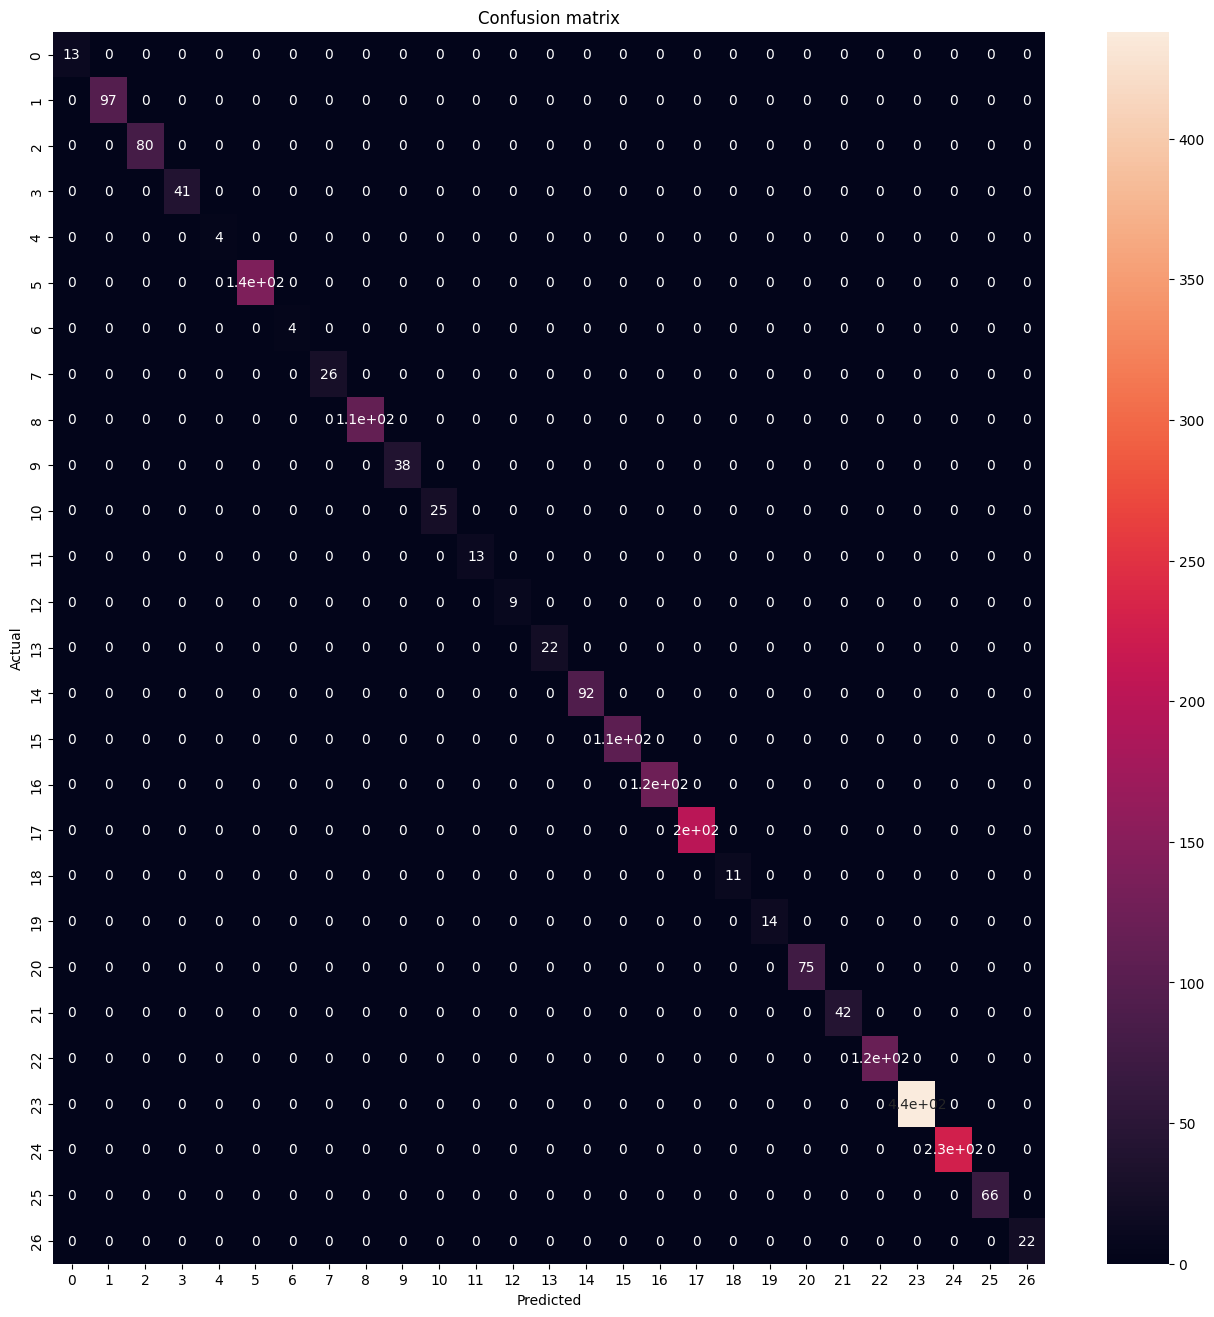

In [50]:
cm = confusion_matrix(lab, pred)
print(cm)
plt.figure(figsize=(16,16))

sns.heatmap(cm, annot=True,)
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')